In [ ]:
from razdel import tokenize, sentenize
from gensim import corpora, models
import pandas as pd
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
import torch
import re
import pymorphy2
import umap
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_json("data_cleaned_historia.json")

In [ ]:
data.head()

,url,abstract,full_text,tags,title,author,date_str,date_parsed,link
0,https://ukraina.ru/20250517/1023584796.html,16 мая 1648 года Войско Запорожское нанесло по...,Узнав о начале восстания казаков под руководст...,"[История, История, Богдан Хмельницкий, XVII ве...",Жёлты воды: первая победа Богдана Хмельницкого,Александр Александров,"17 мая, 16:04",2025-05-17T16:04:00.000,https://ukraina.ru/20250517/1023584796.html
1,https://ukraina.ru/20250525/fotoalbom-pobedy-p...,"В спецпроекте ""Фотоальбом Победы"" мы публикуем...",На главном фото – Полтавско-Кременчугская опер...,"[80 лет Победы, Великая Отечественная война, И...",Фотоальбом Победы: Полтавско-Кременчугская опе...,Сергей Зуев,"25 мая, 10:21",2025-05-25T10:21:00.000,https://ukraina.ru/20250525/fotoalbom-pobedy-p...
2,https://ukraina.ru/20250523/fotoalbom-pobedy-k...,"В спецпроекте ""Фотоальбом Победы"" мы каждый де...",На первом фото — Командующий войсками 1-го Укр...,"[80 лет Победы, Великая Отечественная война, И...",Фотоальбом Победы: командующий войсками 1-го У...,Сергей Зуев,"23 мая, 05:37",2025-05-23T05:37:00.000,https://ukraina.ru/20250523/fotoalbom-pobedy-k...
3,https://ukraina.ru/20250528/1027823642.html,28 мая в Армении отмечают день республики и эт...,К началу восстания Хмельницкого на современных...,"[История, История, Богдан Хмельницкий, XVII ве...",Армяне и Богдан Хмельницкий,Кирилл Ксенофонтов,08:01,2025-05-29T08:01:00.000,https://ukraina.ru/20250528/1027823642.html
4,https://ukraina.ru/20250527/1023662362.html,27 мая 1754 года было завершено строительство ...,"Сам Растрелли в Киеве, кажется, не работал (ст...","[История, История, Украина, история Украины, а...",Андреевская церковь: символ имперского Киева,Василий Стоякин,"Вчера, 16:00",2025-05-28T16:00:00.000,https://ukraina.ru/20250527/1023662362.html


In [ ]:
def split_sentences(text):
    return [s.text for s in sentenize(text)]
data["sentences"] = data["full_text"].apply(split_sentences)

In [ ]:
data.head()

,url,abstract,full_text,tags,title,author,date_str,date_parsed,link,sentences
0,https://ukraina.ru/20250517/1023584796.html,16 мая 1648 года Войско Запорожское нанесло по...,Узнав о начале восстания казаков под руководст...,"[История, История, Богдан Хмельницкий, XVII ве...",Жёлты воды: первая победа Богдана Хмельницкого,Александр Александров,"17 мая, 16:04",2025-05-17T16:04:00.000,https://ukraina.ru/20250517/1023584796.html,[Узнав о начале восстания казаков под руководс...
1,https://ukraina.ru/20250525/fotoalbom-pobedy-p...,"В спецпроекте ""Фотоальбом Победы"" мы публикуем...",На главном фото – Полтавско-Кременчугская опер...,"[80 лет Победы, Великая Отечественная война, И...",Фотоальбом Победы: Полтавско-Кременчугская опе...,Сергей Зуев,"25 мая, 10:21",2025-05-25T10:21:00.000,https://ukraina.ru/20250525/fotoalbom-pobedy-p...,[На главном фото – Полтавско-Кременчугская опе...
2,https://ukraina.ru/20250523/fotoalbom-pobedy-k...,"В спецпроекте ""Фотоальбом Победы"" мы каждый де...",На первом фото — Командующий войсками 1-го Укр...,"[80 лет Победы, Великая Отечественная война, И...",Фотоальбом Победы: командующий войсками 1-го У...,Сергей Зуев,"23 мая, 05:37",2025-05-23T05:37:00.000,https://ukraina.ru/20250523/fotoalbom-pobedy-k...,[На первом фото — Командующий войсками 1-го Ук...
3,https://ukraina.ru/20250528/1027823642.html,28 мая в Армении отмечают день республики и эт...,К началу восстания Хмельницкого на современных...,"[История, История, Богдан Хмельницкий, XVII ве...",Армяне и Богдан Хмельницкий,Кирилл Ксенофонтов,08:01,2025-05-29T08:01:00.000,https://ukraina.ru/20250528/1027823642.html,[К началу восстания Хмельницкого на современны...
4,https://ukraina.ru/20250527/1023662362.html,27 мая 1754 года было завершено строительство ...,"Сам Растрелли в Киеве, кажется, не работал (ст...","[История, История, Украина, история Украины, а...",Андреевская церковь: символ имперского Киева,Василий Стоякин,"Вчера, 16:00",2025-05-28T16:00:00.000,https://ukraina.ru/20250527/1023662362.html,"[Сам Растрелли в Киеве, кажется, не работал (с..."


In [ ]:
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

C:\Users\CYTech Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [ ]:
holodomor_sentences = []

for sentence_list in data['sentences']:
    for sentence in sentence_list:
        if 'голодомор' in sentence.lower():
            holodomor_sentences.append(sentence)

for i, s in enumerate(holodomor_sentences[:5]):
    print(f"{i+1}. {s}")

1. На процессе не судили Адольфа Гитлера, Генриха Гиммлера и Йозефа Геббельса — по причине их смерти (заметим, что организаторов судилища над «организаторами Голодомора» при Ющенко это не остановило — правда, и дело по существу не рассматривалось).
2. В 1933 году, поддавшись на раскручиваемую тему Голодомора, как геноцида населения Украины, писатель от пенсии отказался.
3. Действительно, великий писатель, номинированный на Нобелевскую премию за роман о Голодоморе (романы о голоде в Советской Украине строчить могут только граждане Речи Посполитой; одно непонятно – почему они о голоде в Бенгалии не пишут – это ведь еще дальше).
4. Создателей картины обвиняли также и в попытке скрыть правду о причинах Голодомора.
5. Кроме того, он уделил целую главу полемике с принятой у эмигрантов трактовкой "Голодомора" 1930-х годов:

"Голод на Украине, приведший в 1932-33 годах к гибели многих миллионов населения от голодной смерти, украинские сепаратисты изображают, как мероприятие оккупировавших Укра

In [ ]:
ref_sentences = [
    # Magocsi
    "Between 4.5 and 5 million people died in 1933 alone due to the famine in Ukraine.",
    "The Soviet authorities denied the famine at the time and for decades afterward.",
    "During the famine, Soviet Ukraine was still exporting grain abroad.",
    "An estimated 25,000 people died per day during the spring and summer of 1933.",
    "The famine was caused by policies such as collectivization, excessive quotas, and suppression of peasant resistance.",
    "Officials at local and central levels falsified reports to hide the catastrophic situation.",
    "In August 1932, a law made it a crime to take even a handful of grain, punishable by execution.",
    "The famine was acknowledged by Ukrainian and Western historians only after the 1980s.",
    "There is ongoing debate over whether it was genocide or a broader ideological campaign.",
    
    # Wilson
    "The famine of 1932–33 is seen by many Ukrainians as an act of genocide.",
    "It was part of a campaign to eradicate Ukrainian identity and resistance.",
    "Stalin raised Ukraine’s grain procurement quota by 44% in 1932.",
    "Internal passports were introduced to prevent peasants from fleeing famine areas.",
    "Many ethnic Ukrainians participated in the grain-requisition squads themselves.",
    "The famine targeted Ukrainian smallholders, who were seen as kulaks hostile to Soviet ideology.",
    "The trauma of the famine was so severe that it was repressed in public and private memory.",
    "Although brutal and deliberate, the famine was part of a class war as much as a national one.",
    "Despite commemorations, the Holodomor is still not fully acknowledged in post-Soviet memory."
]

In [ ]:
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
cos = nn.CosineSimilarity(dim=0)

ref_embeddings = model.encode(ref_sentences, convert_to_tensor=True)

results = []

for s in holodomor_sentences:
    s_emb = model.encode(s, convert_to_tensor=True)
    max_sim = max(cos(s_emb, ref_emb).item() for ref_emb in ref_embeddings)
    results.append((s, max_sim))

In [ ]:
results_sorted = sorted(results, key=lambda x: x[1])  # tri croissant (moins proche du consensus)

for sentence, score in results_sorted[:10]:
    print(f"{score:.3f} — {sentence}")

0.365 — В Канаде был создан мемориал жертв Голодомора, а в Конгрессе США – комиссия, занимавшаяся расследованием его обстоятельств.
0.372 — Всего же Ющенко издал около 50 указов, распоряжений, постановлений, поручений, связанных с продвижением темы "голодомора".
0.375 — Именно Кучма в 1998 году ввёл День памяти жертв голодоморов (отмечается каждую четвертую субботу ноября).
0.418 — Кстати, общие знакомые характеризуют её как блестящего журналиста (всё же Гужва выбирал), но при этом человека плохо образованного и способного повторять не слишком адекватные мысли (несколько лет назад она сказала, что Голодомор — расплата за неудачу национальной революции 1917-20 годов).
0.430 — Действительно, великий писатель, номинированный на Нобелевскую премию за роман о Голодоморе (романы о голоде в Советской Украине строчить могут только граждане Речи Посполитой; одно непонятно – почему они о голоде в Бенгалии не пишут – это ведь еще дальше).
0.431 — Современный украинский официоз молчит о Щербицком 

In [ ]:
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
all_sentences = holodomor_sentences + ref_sentences
labels = ['Ukraina.ru'] * len(holodomor_sentences) + ['Reference'] * len(ref_sentences)
embeddings = model.encode(all_sentences)

reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

df_plot = pd.DataFrame({
    'x': embedding_2d[:, 0],
    'y': embedding_2d[:, 1],
    'source': labels,
    'sentence': all_sentences
})

fig = px.scatter(
    df_plot,
    x='x',
    y='y',
    color='source',
    hover_data={'sentence': True, 'source': True},
    title="Carte sémantique des phrases sur Bandera (Ukraina.ru vs Référence)"
)

fig.update_traces(marker=dict(size=10, opacity=0.75))
fig.update_layout(legend_title_text='Source')
fig.show()

C:\Users\CYTech Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
embeddings = torch.tensor(embeddings)

In [ ]:
cos = nn.CosineSimilarity(dim=0)

ref_embeddings = embeddings[-len(ref_sentences):]
candidate_embeddings = embeddings[:len(holodomor_sentences)]

similarity_scores = []

for i, cand_emb in enumerate(candidate_embeddings):
    max_sim = max(cos(cand_emb, ref_emb).item() for ref_emb in ref_embeddings)
    similarity_scores.append((holodomor_sentences[i], max_sim))

sorted_by_divergence = sorted(similarity_scores, key=lambda x: x[1])

print("🔍 10 phrases les plus éloignées du consensus historique (Holodomor) :\n")
for sentence, score in sorted_by_divergence[:10]:
    print(f"{score:.3f} — {sentence}")

🔍 10 phrases les plus éloignées du consensus historique (Holodomor) :

0.365 — В Канаде был создан мемориал жертв Голодомора, а в Конгрессе США – комиссия, занимавшаяся расследованием его обстоятельств.
0.372 — Всего же Ющенко издал около 50 указов, распоряжений, постановлений, поручений, связанных с продвижением темы "голодомора".
0.375 — Именно Кучма в 1998 году ввёл День памяти жертв голодоморов (отмечается каждую четвертую субботу ноября).
0.418 — Кстати, общие знакомые характеризуют её как блестящего журналиста (всё же Гужва выбирал), но при этом человека плохо образованного и способного повторять не слишком адекватные мысли (несколько лет назад она сказала, что Голодомор — расплата за неудачу национальной революции 1917-20 годов).
0.430 — Действительно, великий писатель, номинированный на Нобелевскую премию за роман о Голодоморе (романы о голоде в Советской Украине строчить могут только граждане Речи Посполитой; одно непонятно – почему они о голоде в Бенгалии не пишут – это ведь 

In [ ]:
nltk.download('stopwords')
custom_stopwords = {
    'год', 'это', 'который', 'свой', 'также', 'время', 'один', 'другой',
    'человек', 'мочь', 'стать', 'быть', 'ещё', 'первый', 'после', 'тогда',
    'например', 'самый', 'весь', 'каждый'
}
stop_russian = set(stopwords.words('russian')) | custom_stopwords

morph = pymorphy2.MorphAnalyzer()

def preprocess_article(text):
    text = text.lower()
    text = re.sub(r'[^а-яё\s]', ' ', text)        
    text = re.sub(r'\s+', ' ', text).strip()
    
    sentences = [s.text for s in sentenize(text)]
    
    lemmatized = []
    for sentence in sentences:
        tokens = [t.text for t in tokenize(sentence)]
        lemmas = [
            morph.parse(t)[0].normal_form
            for t in tokens
            if len(t) > 2 and morph.parse(t)[0].normal_form not in stop_russian
]
        lemmatized.append(lemmas)

    return lemmatized

data['lemmatized_sentences'] = data['full_text'].apply(preprocess_article)
data['lemmatized_article'] = data['lemmatized_sentences'].apply(lambda x: sum(x, []))  # flatten
texts = data['lemmatized_article'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = models.LdaModel(corpus=corpus,
                            id2word=dictionary,
                            num_topics=10,
                            passes=10,
                            random_state=42)

def get_article_topics(bow):
    topics = lda_model.get_document_topics(bow)
    return sorted(topics, key=lambda x: -x[1])[:3]  # top 3 topics

data['topics'] = [get_article_topics(bow) for bow in corpus]


[nltk_data] Downloading package stopwords to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
for i, topic in lda_model.print_topics(num_topics=10, num_words=10):
    print(f"Topic {i}: {topic}")

Topic 0: 0.006*"россия" + 0.006*"российский" + 0.004*"военный" + 0.004*"власть" + 0.004*"город" + 0.004*"бессарабия" + 0.004*"русский" + 0.003*"молдавский" + 0.003*"однако" + 0.003*"война"
Topic 1: 0.010*"украина" + 0.009*"украинский" + 0.006*"россия" + 0.005*"советский" + 0.005*"всё" + 0.005*"русский" + 0.004*"война" + 0.004*"польский" + 0.004*"польша" + 0.004*"страна"
Topic 2: 0.014*"украинский" + 0.009*"польский" + 0.005*"польша" + 0.005*"оун" + 0.004*"поляк" + 0.004*"еврей" + 0.004*"организация" + 0.004*"однако" + 0.004*"власть" + 0.004*"украина"
Topic 3: 0.011*"польский" + 0.011*"войско" + 0.010*"русский" + 0.008*"казак" + 0.008*"король" + 0.007*"польша" + 0.006*"война" + 0.005*"гетман" + 0.005*"князь" + 0.005*"россия"
Topic 4: 0.013*"ленин" + 0.007*"украинский" + 0.006*"национальный" + 0.006*"павленко" + 0.006*"россия" + 0.005*"украина" + 0.004*"всё" + 0.004*"русский" + 0.004*"советский" + 0.004*"вопрос"
Topic 5: 0.013*"армия" + 0.007*"фронт" + 0.007*"войско" + 0.006*"генерал" + 

In [ ]:
topic_labels = {
    0: "Russie & Géopolitique",
    1: "Ukraine contemporaine",
    2: "OUN, Shoah, Pologne",
    3: "Cosaques & Guerre Pologne-Russie",
    4: "Léninisme & Nation",
    5: "Armée rouge & WWII",
    6: "Vie soviétique",
    7: "Église & Kyiv chrétien",
    8: "Culture & Boulgakov",
    9: "Russie impériale & Figures"
}

In [ ]:
def get_relevant_topic_labels(bow, threshold=0.1):
    topics = lda_model.get_document_topics(bow)
    return [topic_labels.get(topic_id, f"Topic {topic_id}") for topic_id, weight in topics if weight >= threshold]


data['relevant_topics'] = [get_relevant_topic_labels(bow) for bow in corpus]

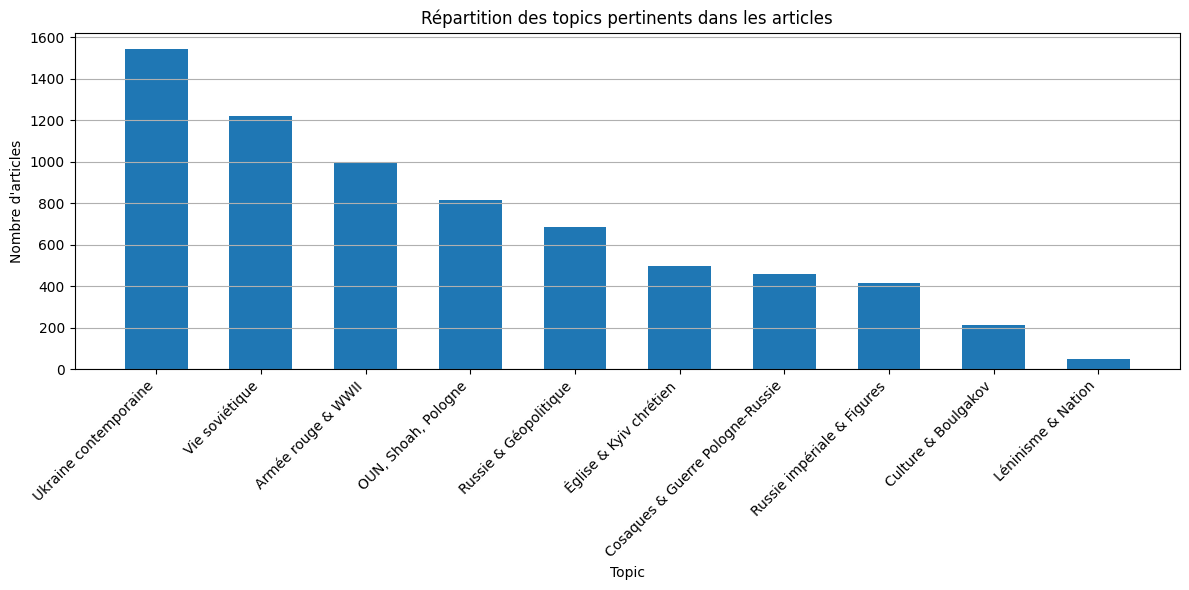

In [ ]:
topic_counts = data['relevant_topics'].explode().value_counts()
topic_names = topic_counts.index.tolist()
positions = range(len(topic_names))

# Affichage
plt.figure(figsize=(12, 6))
plt.bar(positions, topic_counts.values, align='center', width=0.6)
plt.title("Répartition des topics pertinents dans les articles")
plt.xlabel("Topic")
plt.ylabel("Nombre d'articles")
plt.xticks(ticks=positions, labels=topic_names, rotation=45, ha='right')  # clé : ha='right'
plt.grid(axis='y')
plt.tight_layout()
plt.show()
